In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

KeyboardInterrupt: 

In [ ]:
# Load the dataset
df = pd.read_csv('/content/bill_authentication.csv')

In [ ]:
# Split data into features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 90.91%
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       148
           1       0.93      0.87      0.90       127

    accuracy                           0.91       275
   macro avg       0.91      0.91      0.91       275
weighted avg       0.91      0.91      0.91       275



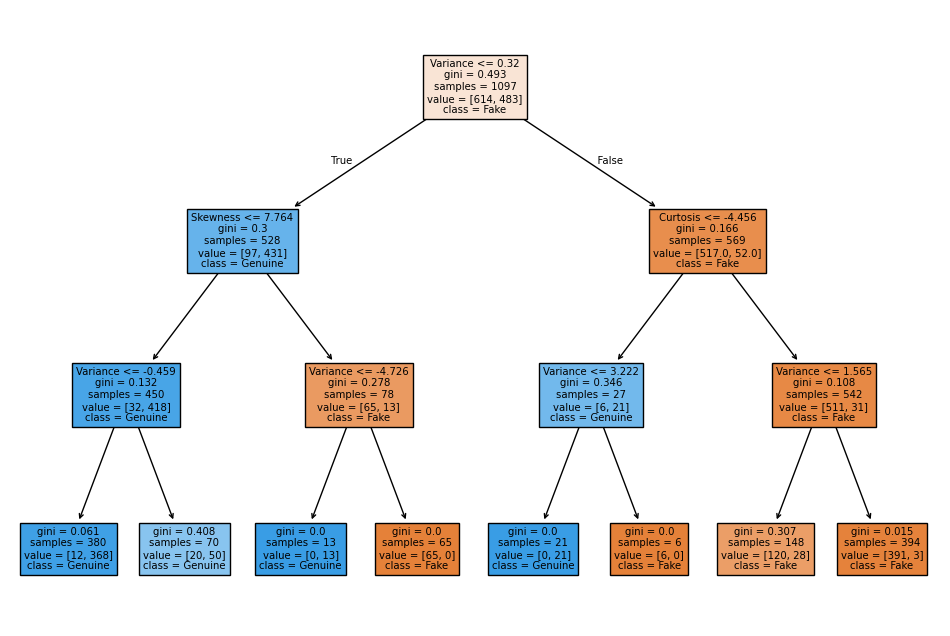

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Fake', 'Genuine'], filled=True)
plt.show()

In [ ]:
# Predict a new sample
new_sample = np.array([[2.3, 1.5, 0.8, -2.1]])  # Example input
predicted_class = model.predict(new_sample)
print(f'Predicted class: {predicted_class[0]}')

Predicted class: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
